In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [50]:
# importing dataset
mnis=tf.keras.datasets.mnist

In [51]:
# splitting the dataset
(x_train,y_train),(x_test,y_test)=mnis.load_data()

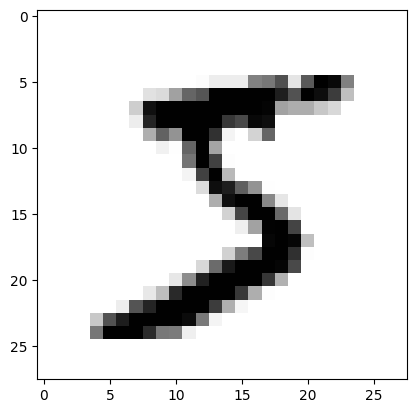

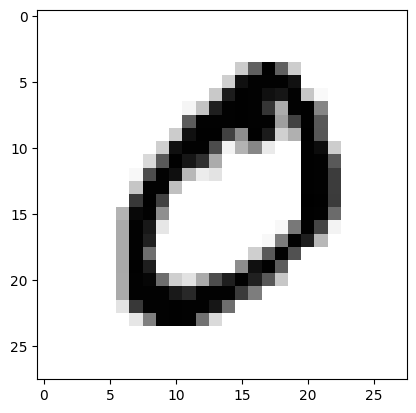

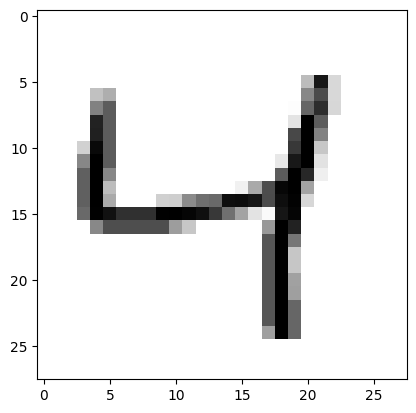

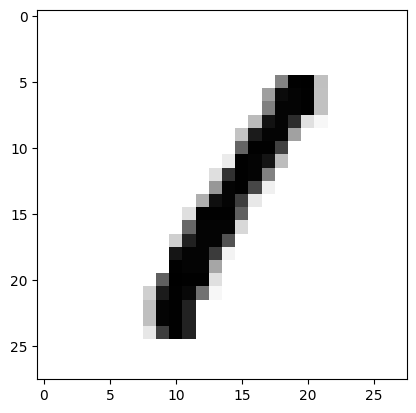

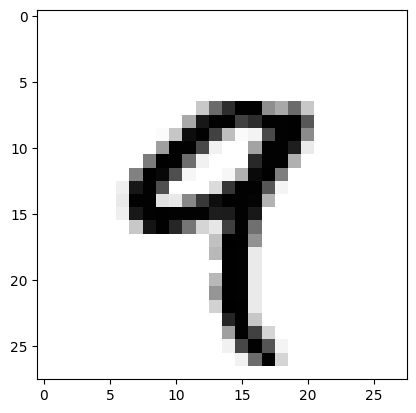

In [52]:
for i in range(0,5):
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.show()

In [53]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [54]:
# normalizing data or we can say scaling the data 
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

In [55]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [56]:
# cnn
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
# feed forward
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [59]:
# cnn model fitting with epoch 5
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8829 - loss: 0.3873
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9829 - loss: 0.0565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0224


In [60]:
val_loss_cnn_before,val_acc_cnn_before=model.evaluate(x_test,y_test)
print("acc",val_acc_cnn_before)
print("val loss",val_loss_cnn_before )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0401
acc 0.9904999732971191
val loss 0.03130495920777321


In [61]:
# cnn model fitting with extra 10 epoch
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0157
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0116
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0103
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9978 - loss: 0.0068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9977 - loss: 0.0074
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9984 - loss: 0.0047
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9985 - loss: 0.0049
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9982 - loss: 0.0061
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0058


In [62]:
# evaluating cnn model after total 15 epoch
val_loss_cnn,val_acc_cnn=model.evaluate(x_test,y_test)
print("acc",val_acc_cnn)
print("val loss",val_loss_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0580
acc 0.991100013256073
val loss 0.04475618153810501


In [63]:
# feed forward model fitting with epoch 5
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8696 - loss: 0.4572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9658 - loss: 0.1125
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0738
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0495
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0384


In [64]:
# evaluating feed forward model
val_loss_before,val_acc_feed_before=model1.evaluate(x_test,y_test)
print("acc",val_acc_feed_before)
print("val loss",val_loss_before)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9693 - loss: 0.0970
acc 0.9751999974250793
val loss 0.08664289861917496


In [65]:
# feed forward model fitting with 10 more epoch
model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9906 - loss: 0.0282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0232
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9942 - loss: 0.0168
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9961 - loss: 0.0108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9965 - loss: 0.0106
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9967 - loss: 0.0095
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0078
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9971 - loss: 0.0081


In [66]:
# evaluating feed forward model after total 15 epoch
val_loss_feed,val_acc_feed=model1.evaluate(x_test,y_test)
print("acc",val_acc_feed)
print("val loss",val_loss_feed)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9747 - loss: 0.1449
acc 0.9769999980926514
val loss 0.13293226063251495


In [67]:
print("accuracy of cnn after 5 epoch",val_acc_cnn_before*100)
print("accuracy of cnn after 15 epoch",val_acc_cnn*100)
print("accuracy of feed forward after 5 epoch",val_acc_feed_before*100)
print("accuracy of feed forward after 15 epoch",val_acc_feed*100)

accuracy of cnn after 5 epoch 99.04999732971191
accuracy of cnn after 15 epoch 99.1100013256073
accuracy of feed forward after 5 epoch 97.51999974250793
accuracy of feed forward after 15 epoch 97.69999980926514


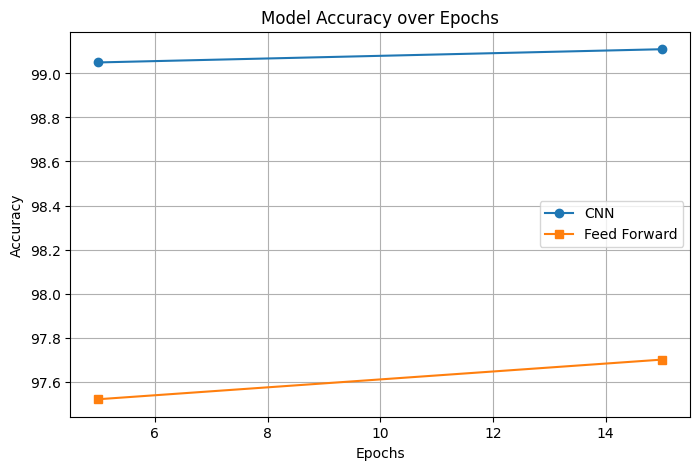

In [68]:
model_1_accuracy = [val_acc_cnn_before*100, val_acc_cnn*100]  # Accuracy for Model 1 after 5 and 15 epochs
model_2_accuracy = [val_acc_feed_before*100, val_acc_feed*100]  # Accuracy for Model 2 after 5 and 15 epochs
epochs = [5, 15]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, model_1_accuracy, marker='o', label='CNN')
plt.plot(epochs, model_2_accuracy, marker='s', label='Feed Forward')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()